### BLACK FRIDAY EXPLORATORY DATA ANALYSIS ::

Problem Statement :A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories.They have shared purchase summary of various customers for selected high volume products from last month.The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


### Importing all required libraries for Data analysis:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the datasets :

In [2]:
df_train = pd.read_csv("/Users/sukhen/Desktop/CSV_files/Black_friday/train.csv",skipinitialspace=True)
df_test = pd.read_csv("/Users/sukhen/Desktop/CSV_files/Black_friday/test.csv",skipinitialspace=True)

In [3]:
df_train.head()
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
# Getting the size information of both the datasets

print('Train_df:\n',df_train.shape)
print('Train_df:\n',df_test.shape)

#Observations : The train dataset has 550068 rows and 12 columns 
#and the test dataset has 233599 rows and 11 columns

Train_df:
 (550068, 12)
Train_df:
 (233599, 11)


In [5]:
# Checking if the dataset has null values:

print('Train_df:\n\n',df_train.isnull().sum())
print('Test_df:\n\n',df_test.isnull().sum())

#Observations: The Product_Category_2 and Product_category_3 has huge null values with them in both the datasets

Train_df:

 User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64
Test_df:

 User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64


In [6]:
# checking with all columns in the train dataset

print('Train_columns\n',df_train.columns)
print('Test_columns\n',df_test.columns)

Train_columns
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
Test_columns
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


In [7]:
# Merging both the datasets together to make a final_df :

final_df = df_train.append(df_test,ignore_index=False,verify_integrity=False)
final_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
# Looking at the shape of final dataset comprising of both train and test dataset:

final_df.shape

#Observations: The final dataset has 783667 rows and 12 columns

(783667, 12)

In [9]:
# Checking how many unique product_ids got sold on Black friday

final_df.Product_ID.nunique()

3677

In [10]:
# Determining the general statistics of our dataset
final_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
# Checking for null values in our dataset

print('The null values in the dataset are as follows:\n',final_df.isnull().sum())

The null values in the dataset are as follows:
 User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64


In [12]:
# Removing the unwanted feature from the dataset
final_df.drop(['User_ID'],axis=1,inplace = True)

In [13]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
# Mapping Gender variable with 0's and 1's
final_df['Gender']= final_df['Gender'].map({'F':0,'M':1})
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
# Getting the different buckets of age bracket purchased during the black friday sale 
final_df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
#Mapping Age categorical variable with different levels :
final_df['Age']= final_df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


MAPPING AGE CATEGORY WITH THESE NUMBERS :'0-17':: 1,'18-25':: 2,'26-35':: 3,'36-45':: 4,'46-50':: 5,
'51-55':: 6,'55+':: 7

In [17]:
#Fixing categorical variable City_Category:
final_df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [18]:
final_df['City_Category']= final_df['City_Category'].map({'A':1,'B':2,'C':3})
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0


Mapping City Category with following numbers :
A:1, B:2 ,C:3

In [19]:
# Working with Stay_In_Current_City_Years Variable
final_df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
final_df['Stay_In_Current_City_Years'].replace('4+',4,inplace = True)
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4,0,8,NaN,NaN,7969.0


In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 71.7+ MB


In [22]:
# Changing the Dtype of Stay_In_Current_City_Years into an integer
final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].astype('int64')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


### Working with Missing Values

In [23]:
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [24]:
#Checking the distribution of the product_category_2
final_df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [25]:
print('The mean is :',final_df.Product_Category_2.mean())
print('The median is :',final_df.Product_Category_2.median())
print('The mode is :',final_df.Product_Category_2.mode())

# Seeing the above measures of central tendency we will go with replacing all null values with Mode
# This can lead to a bias in dataset when working with this approach,but eventually we have to give it one value 
# so I would be going into replacing it with MODE

The mean is : 9.844505612021909
The median is : 9.0
The mode is : 0    8.0
dtype: float64


In [26]:
final_df['Product_Category_2'].mode()[0]

8.0

In [27]:
#Filling in all the missing values in Product_Category_2 with Mode:
final_df['Product_Category_2']=final_df['Product_Category_2'].fillna(final_df['Product_Category_2'].mode()[0])
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,NaN,7969.0


In [28]:
#Rechecking if any missing values with the variable
final_df['Product_Category_2'].isnull().sum()

0

In [29]:
#Checking the distribution of the product_category_3
final_df.Product_Category_3.value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [30]:
final_df['Product_Category_3'].mode()[0]

16.0

In [31]:
#Filling in all the missing values in Product_Category_3 with Mode:
final_df['Product_Category_3']=final_df['Product_Category_3'].fillna(final_df['Product_Category_3'].mode()[0])
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [32]:
#Rechecking if any missing values with the variable
final_df['Product_Category_3'].isnull().sum()

0

In [33]:
final_df.Product_Category_3.value_counts()

16.0    592278
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: Product_Category_3, dtype: int64

# Data Visualization :

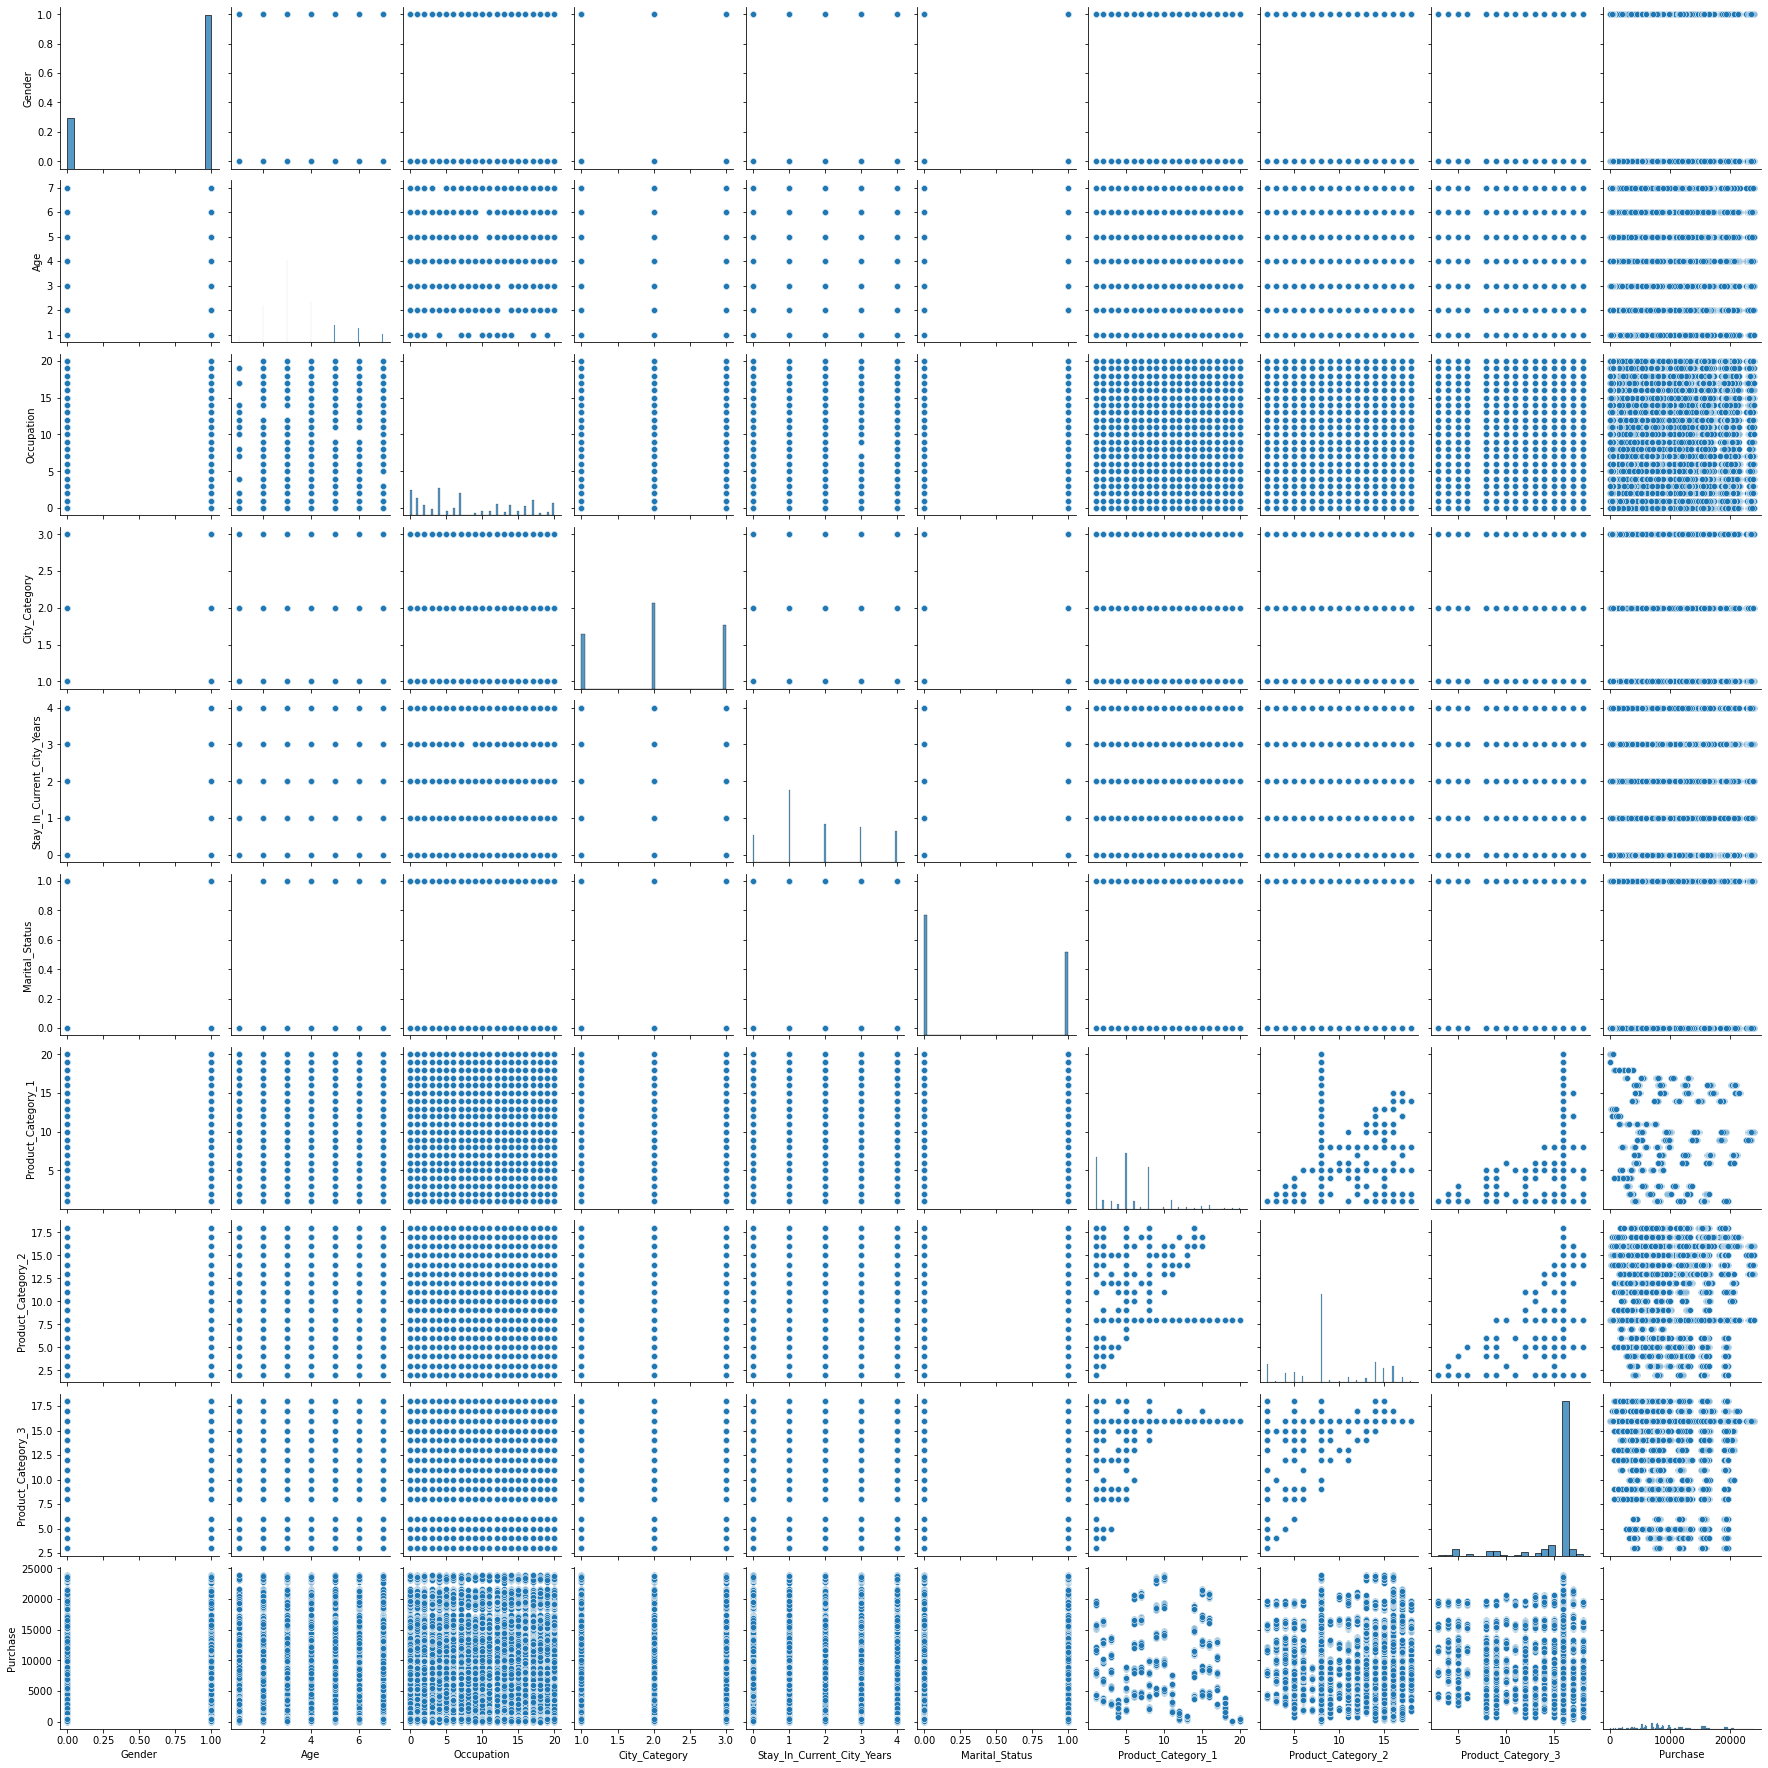

In [35]:
sns.pairplot(final_df,palette = 'dark')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

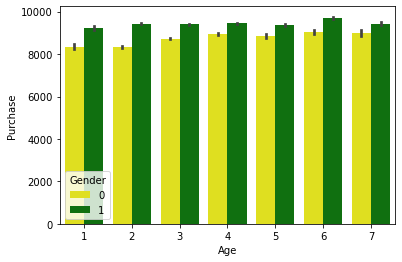

In [42]:
sns.barplot('Age','Purchase',hue = 'Gender',palette = ['Yellow','Green'],data = final_df)

Observations:
1)All age categories have purchased on an average of more than 8000
2)Male are spending more than women in all age categories
3)51-55 group age category are the top purchase customers

In [44]:
final_df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

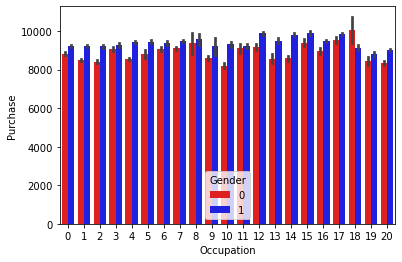

In [45]:
sns.barplot('Occupation','Purchase',hue = 'Gender',palette = ['Red','Blue'],data = final_df)

Obervations: 1)Men and women in 19th & 20th category of occupation spend less comparatively 2)Women in 18th Occupation category topped in purchasing

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

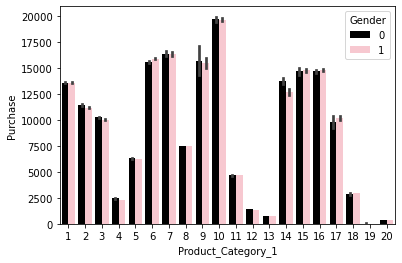

In [54]:
sns.barplot('Product_Category_1','Purchase',hue = 'Gender',palette = ['black','pink'],data = final_df)

Observations: Category 10 is the most sold category in Product_Category_1

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

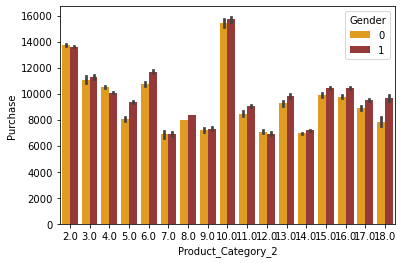

In [56]:
sns.barplot('Product_Category_2','Purchase',hue = 'Gender',palette = ['orange','brown'],data = final_df)

Observations: Category 10 is the most sold category in Product_Category_2

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

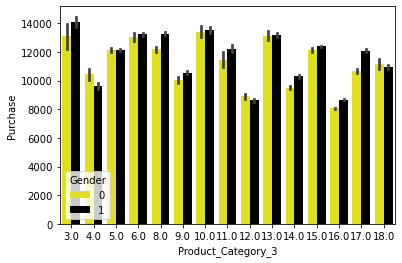

In [57]:
sns.barplot('Product_Category_3','Purchase',hue = 'Gender',palette = ['yellow','black'],data = final_df)

Observations: Category 3.0 is the most sold category in Product_Category_3

In [59]:
final_df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

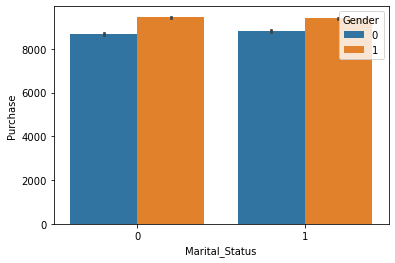

In [60]:
sns.barplot('Marital_Status','Purchase',hue = 'Gender',data = final_df)

Observations: Both married and unmarried people have likely participation in purchase during Black_Friday Sale

<AxesSubplot:>

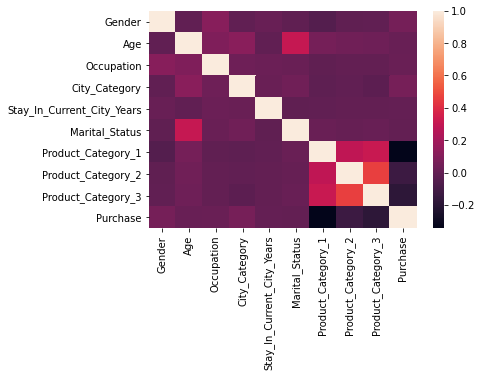

In [63]:
sns.heatmap(final_df.corr())

# Insights

In [71]:
# Top 5 Product_ID purchased by customers: 

final_df.Product_ID.value_counts()

#P00265242,P00025442,P00110742,P00112142,P00046742 are the top five products sold during Black friday   

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00268942       1
P00042642       1
P00107942       1
P00063442       1
P00068342       1
Name: Product_ID, Length: 3677, dtype: int64

In [73]:
# Top age bracket purchased during Black_Friday:
final_df.Age.value_counts()

# Age(26-35) was the top purchasing age bracket 

3    313015
4    156724
2    141953
5     65278
6     54784
7     30579
1     21334
Name: Age, dtype: int64

In [78]:
# Which occupation people spent the most:
final_df['Occupation'].value_counts()

# People from occupation 4 spent the most during the sale

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

In [79]:
#Which City_category purchased heavily:
final_df.City_Category.value_counts()

# People from City_Category 2 purchased more over 1 and 3

2    329739
3    243684
1    210244
Name: City_Category, dtype: int64

In [80]:
final_df.Marital_Status.value_counts()
# Unmarried people purchased more than married couples 

0    462538
1    321129
Name: Marital_Status, dtype: int64

In [115]:
max_purchase = max(final_df['Purchase'])
max_purchase

# Maximum purchase made during the black friday sale is 23961

23961.0

### Insights:
### Maximum purchase made during the black friday sale is 23961
### Unmarried people purchased more than married couples
### People from City_Category 2 purchased more over 1 and 3 City_Category
### People from occupation 4 spent the most during the sale
### Age(26-35) was the top purchasing age bracket 
### P00265242,P00025442,P00110742,P00112142,P00046742 are the top five products sold during Black friday 